# Análisis Exploratorio de Señales ABF (Axon Binary File)

**Presentado por:** *Daniel Andrés Crovo Pérez y Sebastián Franco*, **Fecha:** *31 de Enero de 2024*

**Directora de proyecto:** *C. Gauthier*, **Proyecto de grado:** *Aprendizaje Profundo para la Clasificación de Estructuras Cerebrales en Senales de Electroencefalograma intracraneal de Ratas*

**Maestría de Inteligencia Artificial**, **Pontificia Universidad Javeriana**

## Análisis de Señales ABF (Axon Binary File)

Este Jupyter Notebook proporciona un conjunto de herramientas desarrolladas en Python para la **carga, análisis y visualización de señales electrofisiológicas** almacenadas en formato ABF (Axon Binary File). Este formato es ampliamente utilizado en **neurociencia** y otras áreas de investigación biomédica para almacenar datos de señales eléctricas como los obtenidos en experimentos de electrofisiología.
### Objetivo

El objetivo principal de este notebook es facilitar el análisis detallado de las señales ABF, permitiendo al usuario observar y examinar secciones específicas de la señal. Para lograr esto, se han desarrollado varias funciones que abordan diferentes aspectos del proceso de análisis:

1. **Carga y Extracción de Metadatos**: La primera parte del análisis implica la carga del archivo ABF y la extracción de metadatos relevantes. Esto incluye detalles como la frecuencia de muestreo, el número de canales y episodios, y otra información crítica que ayuda a entender la estructura de los datos.

2. **Manejo de Diferentes Modos de Grabación**: Dado que los archivos ABF pueden contener datos adquiridos en diferentes modos (como gap-free, episódico fijo y episódico variable), se proporciona una función para determinar el modo de grabación del archivo. Esta información es crucial para decidir cómo procesar y analizar los datos.

3. **Selección de Datos Específicos**: Una función avanzada permite seleccionar segmentos específicos de los datos basándose en el tiempo, episodios específicos o canales específicos. Esto es particularmente útil cuando solo una parte de la señal es de interés para el análisis detallado.

4. **Visualización de Datos**: Se incluyen funciones para visualizar las señales. Estas permiten graficar los datos de cada canal tanto individualmente como en conjunto, facilitando una comparación visual y un análisis más profundo de las señales.

### Uso

Este notebook está diseñado para ser tanto instructivo como práctico. Cada función está documentada y ejemplificada para su fácil comprensión y aplicación. Los usuarios pueden cargar sus propios archivos ABF y utilizar estas herramientas para explorar y analizar sus datos de señales.
datos de señales.
tos de señales.

## Prerequisito

Se debe instalar la librería **pyabf** en la máquina que ejecutará el notebook: 

<u>pip install pyabf</u>


## Librerías
Se usarán las siguientes librerías en el proyecto

In [1]:
import pyabf
import numpy as np
import matplotlib.pyplot as plt

## Ruta del archivo
Se debe modificar la siguiente ruta del archivo por la ruta que contiene la señal en la máquina. 

In [2]:
ruta = "C:/Users/franc/Downloads/Datos/15o14000.ABF"

#C:\Users\franc\Downloads\Datos

## Funciones
Se crearon las funciones:

In [3]:
def determinar_modo_grabacion(abf):
    """
    Determina el modo de grabación de un archivo ABF.

    :param abf: Objeto ABF cargado.
    :return: String que describe el modo de grabación.
    """

    if abf.sweepCount > 1:
        # Si hay más de un episodio, es episódico
        # Verificar si todos los episodios tienen la misma longitud
        longitudes_episodios = [abf.sweepLengthInPoints(i) for i in range(abf.sweepCount)]
        if len(set(longitudes_episodios)) == 1:
            return "Episódico Fijo: Datos recopilados en episodios de longitud fija."
        else:
            return "Episódico Variable: Datos recopilados en episodios, pero con longitudes variables."
    else:
        # Si solo hay un "episodio", es gap-free
        return "Gap-Free: Un flujo continuo de datos."

In [4]:
def extraer_metadatos(abf):
    """
    Extrae metadatos de un objeto ABF ya cargado.

    :param abf: Objeto ABF cargado.
    :return: Diccionario con metadatos del objeto ABF.
    """

    metadatos = {
        "nombre_archivo": abf.abfID,
        "frecuencia_muestreo": abf.dataRate,
        "numero_canales": abf.channelCount,
        "numero_episodios": abf.sweepCount,
        "tiempo_total": abf.sweepCount / abf.dataRate,
        "fecha_grabacion": abf.abfDateTimeString,
        "comentarios": abf.abfFileComment,
        "unidad_tiempo": "segundos",
        "unidades_canal": {},
        "etiquetas_canal": {},
        "dimensiones_datos": abf.data.shape
    }

    for i in range(abf.channelCount):
        canal = abf.setSweep(0, channel=i)
        metadatos["unidades_canal"][i] = abf.sweepUnitsY
        metadatos["etiquetas_canal"][i] = abf.sweepLabelY

    return metadatos

In [5]:
def seleccionar_datos(abf, inicio=0, fin=None, episodios='todos', canales='todos'):
    """
    Selecciona segmentos específicos de datos en un archivo ABF.

    :param abf: Objeto ABF cargado.
    :param inicio: Inicio del segmento de tiempo para la selección de datos (en segundos).
    :param fin: Fin del segmento de tiempo para la selección de datos (en segundos).
    :param episodios: Episodios específicos a leer. Puede ser un número, una lista o 'todos'.
    :param canales: Canales específicos a leer. Puede ser un número, una lista o 'todos'.
    :return: Tupla con el tiempo y los datos seleccionados.
    """

    datos_seleccionados = {}
    frecuencia_muestreo = abf.dataRate  # Frecuencia de muestreo en Hz

    # Convertir segundos a puntos de muestreo
    punto_inicio = int(inicio * frecuencia_muestreo)
    punto_fin = int(fin * frecuencia_muestreo) if fin is not None else None

    episodios_a_leer = range(abf.sweepCount) if episodios == 'todos' else episodios
    canales_a_leer = range(abf.channelCount) if canales == 'todos' else canales

    for i in episodios_a_leer:
        abf.setSweep(sweepNumber=i)
        tiempo = abf.sweepX[punto_inicio:punto_fin]  # Tiempo en segundos
        for canal in canales_a_leer:
            abf.setSweep(sweepNumber=i, channel=canal)
            datos_seleccionados[(i, canal)] = abf.sweepY[punto_inicio:punto_fin]

    return tiempo, datos_seleccionados


In [6]:
# Asegúrate de ejecutar esta línea en un Jupyter Notebook para activar el modo interactivo de Matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets

def graficar_canales_interactivo(tiempo, datos, metadatos, titulo="Datos ABF por Canal"):
    """
    Grafica los datos de cada canal de un archivo ABF de manera interactiva,
    utilizando los metadatos para las unidades.
    """
    
    def actualizar_grafica(episodio=None, canal=None):
        # Limpia la figura actual
        plt.clf()
        
        # Decide qué datos graficar
        if episodio is not None and canal is not None:
            clave = (episodio, canal)
            valores = datos[clave]
            unidad = metadatos["unidades_canal"].get(canal, "Unidad Desconocida")
            plt.plot(tiempo, valores)
            plt.title(f"{titulo} - Episodio {episodio}, Canal {canal}")
            plt.ylabel(unidad)
        else:
            # Graficar todos los canales juntos si no se especifica
            for clave, valores in datos.items():
                episodio, canal = clave
                unidad = metadatos["unidades_canal"].get(canal, "Unidad Desconocida")
                plt.plot(tiempo, valores, label=f"Episodio {episodio}, Canal {canal} ({unidad})")
            plt.title(f"{titulo} - Todos los Canales")
            plt.legend()
        
        plt.xlabel("Tiempo (s)")
        plt.show()
    
    # Widget para elegir episodio y canal
    episodios = list({clave[0] for clave in datos.keys()})
    canales = list({clave[1] for clave in datos.keys()})
    episodio_widget = widgets.Dropdown(options=[None] + episodios, description='Episodio:')
    canal_widget = widgets.Dropdown(options=[None] + canales, description='Canal:')
    
    def actualizar_canal(*args):
        episodio = episodio_widget.value
        canal = canal_widget.value
        actualizar_grafica(episodio, canal)
    
    episodio_widget.observe(actualizar_canal, 'value')
    canal_widget.observe(actualizar_canal, 'value')
    
    display(episodio_widget, canal_widget)

    # Inicialmente, mostrar todos los canales juntos
    actualizar_grafica()

In [7]:
%matplotlib widget

## Uso de las diferentes funciones

In [8]:
# Ejemplo de uso
abf = pyabf.ABF(ruta)
modo_grabacion = determinar_modo_grabacion(abf)
print("Modo de grabación:", modo_grabacion)

Modo de grabación: Gap-Free: Un flujo continuo de datos.


In [9]:
# Usar la función modificada para extraer metadatos
metadatos = extraer_metadatos(abf)

for i in metadatos: 
    print(i,": ", metadatos[i])

nombre_archivo :  15o14000
frecuencia_muestreo :  20833
numero_canales :  3
numero_episodios :  1
tiempo_total :  4.8000768012288194e-05
fecha_grabacion :  2015-10-14T11:57:51.536
comentarios :  vM1CA1003 Cx750um H2.5mm  CA1St 0.0mA*1 WPSt 100us 0mA *1
unidad_tiempo :  segundos
unidades_canal :  {0: 'mV', 1: 'mV', 2: 'V'}
etiquetas_canal :  {0: 'Membrane Potential (mV)', 1: 'Membrane Potential (mV)', 2: 'IN 7 (V)'}
dimensiones_datos :  (3, 6250000)


In [10]:
# Ejemplo de uso
tiempo, datos = seleccionar_datos(abf, inicio=0, fin=10, episodios=[0], canales=[0,1,2])

print(datos)

{(0, 0): array([0.0075, 0.01  , 0.01  , ..., 0.015 , 0.0225, 0.0175], dtype=float32), (0, 1): array([-0.2   , -0.2   , -0.2075, ...,  0.155 ,  0.1725,  0.165 ],
      dtype=float32), (0, 2): array([0.05 , 0.045, 0.06 , ..., 0.05 , 0.05 , 0.055], dtype=float32)}


In [41]:
tiempo, datos2 = seleccionar_datos(abf, inicio=0, fin=10, episodios=[0], canales=[0,1])

Dropdown(description='Episodio:', options=(None, 0), value=None)

Dropdown(description='Canal:', options=(None, 0, 1, 2), value=None)

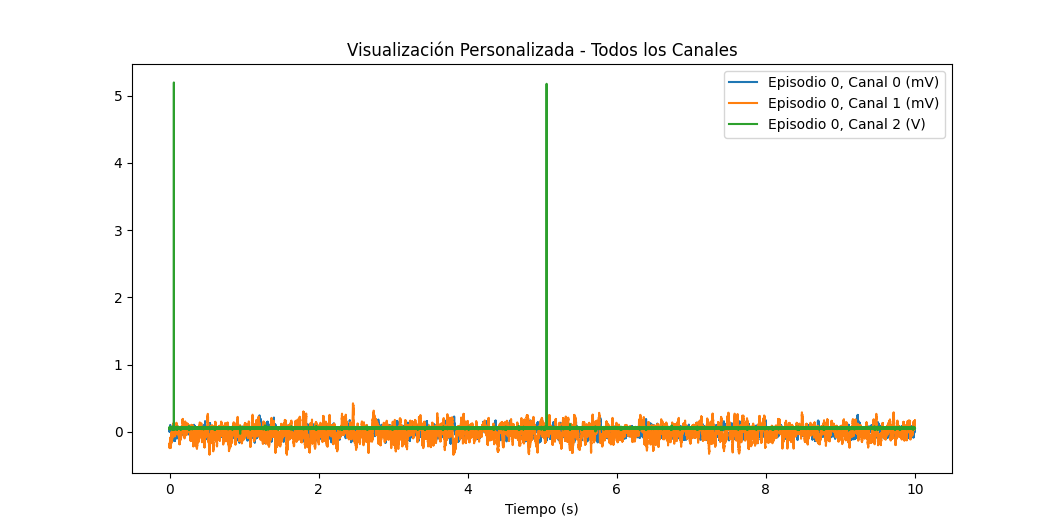

In [44]:
# Ejemplo de uso
graficar_canales_interactivo(tiempo, datos, metadatos, "Visualización Personalizada")

Dropdown(description='Episodio:', options=(None, 0), value=None)

Dropdown(description='Canal:', options=(None, 0, 1), value=None)

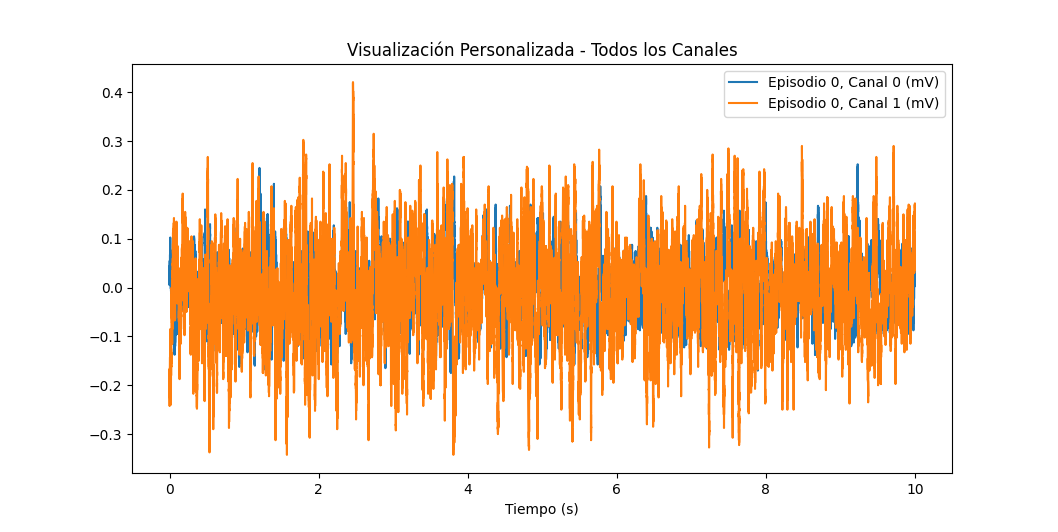

In [45]:
# Ejemplo de uso
graficar_canales_interactivo(tiempo, datos2, metadatos, "Visualización Personalizada")

In [16]:
import numpy as np
from scipy.signal import find_peaks

def extraer_segmentos_entre_impulsos(abf, canal, voltaje_umbral=5, distancia_minima_entre_impulsos=1000):
    """
    Extrae y devuelve segmentos de una señal que están entre impulsos definidos por un voltaje umbral,
    para un canal específico de una señal ABF multi-canal.

    :param abf: Objeto ABF cargado, por ejemplo, usando pyABF.
    :param canal: Índice del canal (basado en cero) a procesar.
    :param voltaje_umbral: Umbral de voltaje para detectar impulsos.
    :param distancia_minima_entre_impulsos: Distancia mínima en índices entre picos consecutivos.
    :return: Lista de arrays de NumPy, cada uno representando un segmento de la señal entre impulsos para el canal dado.
    """
    
    segmentos = []

    # Iterar a través de cada episodio (sweep) en el archivo ABF
    for i in range(abf.sweepCount):
        # Establecer el sweep actual y el canal
        abf.setSweep(i, channel=canal)
        
        # Extraer la señal para el episodio y canal actuales
        senal = abf.sweepY
        
        # Detectar los picos (impulsos) basándose en el umbral de voltaje
        picos, _ = find_peaks(senal, height=voltaje_umbral, distance=distancia_minima_entre_impulsos)
        
        # Extraer segmentos entre los picos
        inicio_segmento = 0
        for pico in picos:
            segmentos.append(senal[inicio_segmento:pico])  # Asumiendo que el pico es el inicio del impulso
            inicio_segmento = pico + 1  # Asumiendo que el impulso termina justo después del pico
        
        # Añadir el último segmento después del último pico, si existe
        if inicio_segmento < len(senal):
            segmentos.append(senal[inicio_segmento:])
    
    return segmentos

In [32]:
segmentos_canal_0 = extraer_segmentos_entre_impulsos(abf, 2, voltaje_umbral=5, distancia_minima_entre_impulsos=1000)

In [33]:
len(segmentos_canal_0)

61

In [46]:
def dividir_señales_en_ciclos(abf, canal, fs):
    """
    Divide una señal en ciclos basándose en su frecuencia dominante.

    :param abf: Objeto ABF cargado.
    :param canal: Índice del canal a procesar.
    :param fs: Frecuencia de muestreo de la señal.
    :return: Lista de segmentos de la señal, cada uno correspondiendo a un ciclo.
    """
    abf.setSweep(sweepNumber=0, channel=canal)
    senal = abf.sweepY
    
    # Encontrar la frecuencia dominante
    frecuencia_dominante = encontrar_frecuencia_dominante(senal, fs)
    periodo = 1 / frecuencia_dominante  # Duración de un ciclo en segundos
    
    # Calcular el número de muestras por ciclo
    muestras_por_ciclo = int(np.round(periodo * fs))
    
    # Dividir la señal en segmentos basados en el número estimado de muestras por ciclo
    segmentos = [senal[i:i+muestras_por_ciclo] for i in range(0, len(senal), muestras_por_ciclo)]
    
    return segmentos


In [48]:
import numpy as np

def encontrar_frecuencia_dominante(senal, fs):
    """
    Encuentra la frecuencia dominante de una señal utilizando FFT.

    :param senal: Array de NumPy con los datos de la señal.
    :param fs: Frecuencia de muestreo de la señal.
    :return: La frecuencia dominante en la señal.
    """
    # Aplicar FFT a la señal
    fft_res = np.fft.fft(senal)
    freqs = np.fft.fftfreq(len(senal), d=1/fs)
    
    # Encontrar el índice de la frecuencia con la mayor magnitud en la FFT (excluyendo la componente de DC)
    idx = np.argmax(np.abs(fft_res[1:])) + 1
    frecuencia_dominante = abs(freqs[idx])
    
    return frecuencia_dominante

In [54]:
metadatos['frecuencia_muestreo']

20833

In [55]:
len(dividir_señales_en_ciclos(abf, 2, metadatos['frecuencia_muestreo']))

2040

In [36]:
def canal_tiene_picos(abf, canal, voltaje_umbral=5):
    abf.setSweep(sweepNumber=0, channel=canal)
    senal = abf.sweepY
    picos, _ = find_peaks(senal, height=voltaje_umbral)
    return len(picos) > 0

In [40]:
canal_tiene_picos(abf, 0, voltaje_umbral=5)

False

In [60]:
def dividir_señales_por_tiempo(abf, ventana_tiempo_ms=290):
    """
    Divide las señales de un objeto ABF en segmentos basados en una ventana de tiempo.
    
    :param abf: Objeto ABF cargado.
    :param ventana_tiempo_ms: Ventana de tiempo en milisegundos para dividir las señales.
    :return: Lista de diccionarios, cada uno representando segmentos de señales con sus metadatos.
    """
    fs = abf.dataRate  # Frecuencia de muestreo en Hz
    muestras_por_segmento = int((ventana_tiempo_ms / 1000) * fs)  # Número de muestras por segmento
    
    segmentos = []
    for canal in range(abf.channelCount):
        for sweep in range(abf.sweepCount):
            abf.setSweep(sweepNumber=sweep, channel=canal)
            for i in range(0, abf.sweepPointCount, muestras_por_segmento):
                # Asegurarse de no exceder el límite de la señal
                fin_segmento = min(i + muestras_por_segmento, abf.sweepPointCount)
                # Extraer segmento
                datos_segmento = abf.sweepY[i:fin_segmento]
                tiempo_segmento = abf.sweepX[i:fin_segmento]
                # Guardar segmento y metadatos
                segmentos.append({
                    'canal': canal,
                    'sweep': sweep,
                    'datos': datos_segmento,
                    'tiempo': tiempo_segmento,
                    'metadatos': {
                        'unidad_medida': abf.adcUnits[canal],
                        'frecuencia_muestreo': fs,
                        'inicio_ms': i / fs * 1000,
                        'fin_ms': fin_segmento / fs * 1000
                    }
                })
    
    return segmentos


In [62]:
segmentos = dividir_señales_por_tiempo(abf, ventana_tiempo_ms=290)

In [73]:
import numpy as np
from scipy.signal import find_peaks

def dividir_señales_por_tiempo_y_excluir_picos(abf, ventana_tiempo_ms=290, voltaje_umbral=5, distancia_minima_entre_impulsos=1000):
    """
    Divide las señales de un objeto ABF en segmentos basados en una ventana de tiempo y excluye segmentos que contienen picos de impulsos.
    
    :param abf: Objeto ABF cargado.
    :param ventana_tiempo_ms: Ventana de tiempo en milisegundos para dividir las señales.
    :param voltaje_umbral: Umbral de voltaje para detectar impulsos.
    :param distancia_minima_entre_impulsos: Distancia mínima en índices entre picos consecutivos.
    :return: Lista de diccionarios, cada uno representando segmentos de señales sin picos, con sus metadatos.
    """
    fs = abf.dataRate  # Frecuencia de muestreo en Hz
    muestras_por_segmento = int((ventana_tiempo_ms / 1000) * fs)  # Número de muestras por segmento
    
    segmentos = []
    for canal in range(abf.channelCount):
        for sweep in range(abf.sweepCount):
            abf.setSweep(sweepNumber=sweep, channel=canal)
            
            # Detectar los picos (impulsos) en toda la señal de este sweep
            picos, _ = find_peaks(abf.sweepY, height=voltaje_umbral, distance=distancia_minima_entre_impulsos)
            
            for i in range(0, abf.sweepPointCount, muestras_por_segmento):
                fin_segmento = min(i + muestras_por_segmento, abf.sweepPointCount)
                
                # Verificar si el segmento actual contiene alguno de los picos detectados
                if not np.any((picos >= i) & (picos < fin_segmento)):
                    # Si no contiene picos, extraer segmento
                    datos_segmento = abf.sweepY[i:fin_segmento]
                    tiempo_segmento = abf.sweepX[i:fin_segmento]
                    # Guardar segmento y metadatos
                    segmentos.append({
                        'canal': canal,
                        'sweep': sweep,
                        'datos': datos_segmento,
                        'tiempo': tiempo_segmento,
                        'metadatos': {
                            'unidad_medida': abf.adcUnits[canal],
                            'frecuencia_muestreo': fs,
                            'inicio_ms': i / fs * 1000,
                            'fin_ms': fin_segmento / fs * 1000
                        }
                    })
    
    return segmentos


In [74]:
segmentos2 = dividir_señales_por_tiempo_y_excluir_picos(abf, ventana_tiempo_ms=290, voltaje_umbral=5, distancia_minima_entre_impulsos=1000)

In [70]:
import pandas as pd
import json

def guardar_segmentos_y_metadatos(segmentos, metadatos, ruta_directorio):
    """
    Guarda los segmentos de señales en archivos CSV y metadatos en un archivo JSON en la ruta especificada.
    
    :param segmentos: Lista de diccionarios, cada uno representando segmentos de señales con sus metadatos.
    :param metadatos: Diccionario con metadatos adicionales de la señal.
    :param ruta_directorio: Ruta del directorio donde se guardarán los archivos.
    """
    # Guardar metadatos en un archivo JSON
    ruta_metadatos = f"{ruta_directorio}/metadatos.json"
    with open(ruta_metadatos, 'w') as file:
        json.dump(metadatos, file, indent=4)
    
    print(f"Metadatos guardados: {ruta_metadatos}")

    # Guardar cada segmento en un archivo CSV
    for i, segmento in enumerate(segmentos):
        df = pd.DataFrame({
            'Tiempo (s)': segmento['tiempo'],
            'Datos': segmento['datos']
        })
        
        nombre_archivo = f"segmento_{i}_canal_{segmento['canal']}_{segmento['metadatos']['inicio_ms']:.0f}-{segmento['metadatos']['fin_ms']:.0f}ms.csv"
        ruta_completa = f"{ruta_directorio}/{nombre_archivo}"
        
        df.to_csv(ruta_completa, index=False)
        
        print(f"Guardado segmento: {ruta_completa}")


In [72]:
guardar_segmentos_y_metadatos(segmentos, metadatos, 'C:/Users/franc/OneDrive/Documents/Datos2')

Metadatos guardados: C:/Users/franc/OneDrive/Documents/Datos2/metadatos.json
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos2/segmento_0_canal_0_0-290ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos2/segmento_1_canal_0_290-580ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos2/segmento_2_canal_0_580-870ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos2/segmento_3_canal_0_870-1160ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos2/segmento_4_canal_0_1160-1450ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos2/segmento_5_canal_0_1450-1740ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos2/segmento_6_canal_0_1740-2030ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos2/segmento_7_canal_0_2030-2320ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos2/segmento_8_canal_0_2320-2610ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos2/segmento_9_canal_

In [75]:
guardar_segmentos_y_metadatos(segmentos2, metadatos, 'C:/Users/franc/OneDrive/Documents/Datos3')

Metadatos guardados: C:/Users/franc/OneDrive/Documents/Datos3/metadatos.json
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos3/segmento_0_canal_0_0-290ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos3/segmento_1_canal_0_290-580ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos3/segmento_2_canal_0_580-870ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos3/segmento_3_canal_0_870-1160ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos3/segmento_4_canal_0_1160-1450ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos3/segmento_5_canal_0_1450-1740ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos3/segmento_6_canal_0_1740-2030ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos3/segmento_7_canal_0_2030-2320ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos3/segmento_8_canal_0_2320-2610ms.csv
Guardado segmento: C:/Users/franc/OneDrive/Documents/Datos3/segmento_9_canal_